In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import dash
import seaborn as sns
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt
%matplotlib inline

In [5]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(URL)
print('Data read into a pandas dataframe!')
df.head()


Data read into a pandas dataframe!


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [6]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [7]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [8]:
df.head(7)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1
5,NSW,1/9/2005,13.721429,314.757143,64.542857,83.142857,6.175990,38.142857,7,R,2005,1
6,NSW,1/10/2005,16.625455,324.800000,58.554545,91.454545,6.088738,37.072727,11,R,2005,1


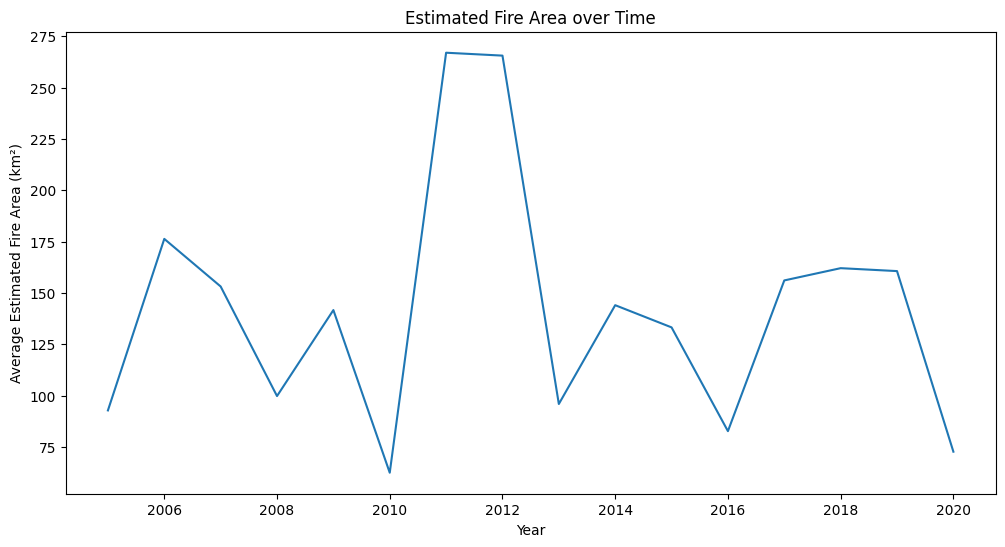

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
    # Grouping the data by 'Year' and calculating the mean of 'Estimated_fire_area'
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
    # Plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

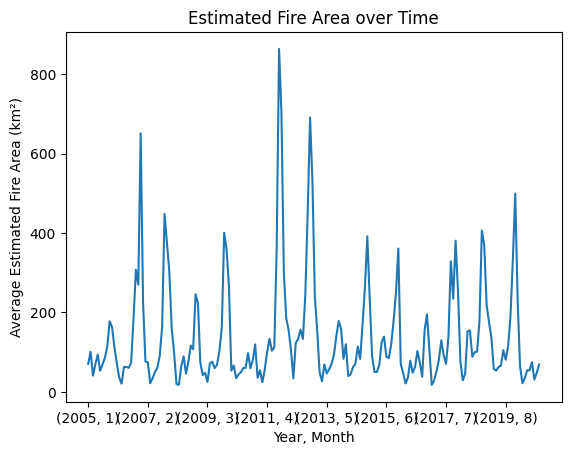

In [10]:
# Grouping the data by both 'Year' and 'Month', and calculating the mean of 'Estimated_fire_area'
df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
# Plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

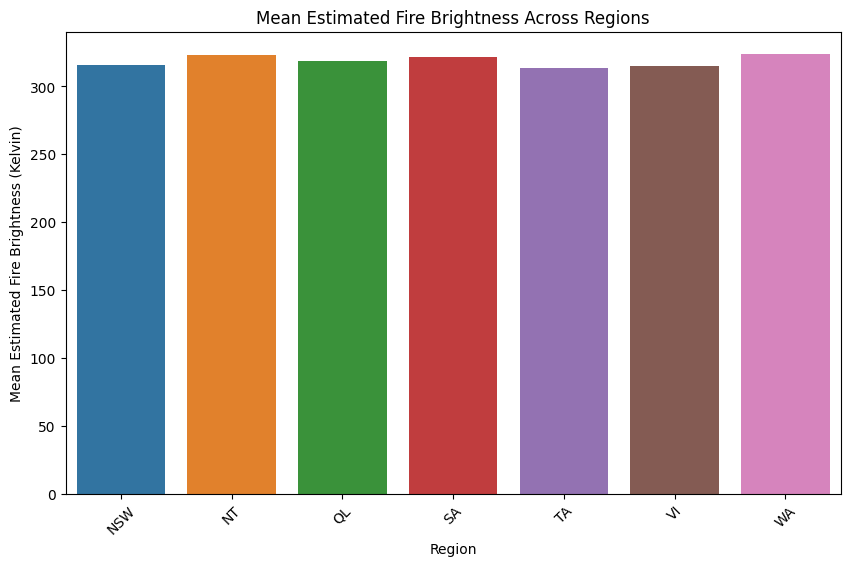

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Mean_estimated_fire_brightness', data=df, ci=None)
plt.title('Mean Estimated Fire Brightness Across Regions')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.xticks(rotation=45)
plt.show()


In [12]:
app = dash.Dash(__name__)
app.config.suppress_callback_exceptions = True
app.layout = html.Div(children=[html.H1('Australia Wildfire Dashboard', 
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 26}),
# TASK 2: Add the radio items and a dropdown right below the first inner division
     #outer division starts
     html.Div([
                   # First inner divsion for  adding dropdown helper text for Selected Drive wheels
                    html.Div([
                            html.H2('Select Region:', style={'margin-right': '2em'}),
                    #Radio items to select the region
                    #dcc.RadioItems(['NSW','QL','SA','TA','VI','WA'], 'NSW', id='region',inline=True)]),
                    dcc.RadioItems([{"label":"New South Wales","value": "NSW"},
                                    {"label":"Northern Territory","value": "NT"},
                                    {"label":"Queensland","value": "QL"},
                                    {"label":"South Australia","value": "SA"},
                                    {"label":"Tasmania","value": "TA"},
                                    {"label":"Victoria","value": "VI"},
                                    {"label":"Western Australia","value": "WA"}],"NSW", id='region',inline=True)]),
                    #Dropdown to select year
                    html.Div([
                            html.H2('Select Year:', style={'margin-right': '2em'}),
                        dcc.Dropdown(df.Year.unique(), value = 2005,id='year')
                    ]),
#TASK 3: Add two empty divisions for output inside the next inner division. 
         #Second Inner division for adding 2 inner divisions for 2 output graphs
                    html.Div([
                
                        html.Div([ ], id='plot1'),
                        html.Div([ ], id='plot2')
                    ], style={'display': 'flex'}),
    ])
    #outer division ends
])
#layout ends
#TASK 4: Add the Ouput and input components inside the app.callback decorator.
#Place to add @app.callback Decorator
@app.callback([Output(component_id='plot1', component_property='children'),
               Output(component_id='plot2', component_property='children')],
               [Input(component_id='region', component_property='value'),
                Input(component_id='year', component_property='value')])
#TASK 5: Add the callback function.   
#Place to define the callback function .
def reg_year_display(input_region,input_year):  
    #data
   region_data = df[df['Region'] == input_region]
   y_r_data = region_data[region_data['Year']==input_year]
    #Plot one - Monthly Average Estimated Fire Area   
   est_data = y_r_data.groupby('Month')['Estimated_fire_area'].mean().reset_index()
   fig1 = px.pie(est_data, values='Estimated_fire_area', names='Month', title="{} : Monthly Average Estimated Fire Area in year {}".format(input_region,input_year))   
     #Plot two - Monthly Average Count of Pixels for Presumed Vegetation Fires
   veg_data = y_r_data.groupby('Month')['Count'].mean().reset_index()
   fig2 = px.bar(veg_data, x='Month', y='Count', title='{} : Average Count of Pixels for Presumed Vegetation Fires in year {}'.format(input_region,input_year))    
   return [dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2) ]
if __name__ == '__main__':
    app.run_server()